In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install opencv-python-headless

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
import numpy as np

X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)

In [3]:
from sklearn.model_selection import train_test_split

X_sub, _, y_sub, _, = train_test_split(X, y, train_size=20000, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("Scaler",StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [7]:
param_grid = {
    "knn__n_neighbors":[3,5,7,9],
    "knn__weights":["uniform", "distance"],
    "knn__metric":["euclidean", "manhattan"]
}

In [8]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [11]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.9406


In [12]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

In [13]:
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9475


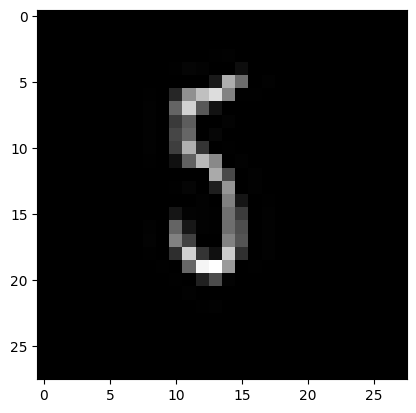

Predicted digit: 1


/home/mrstatic/Documents/ML-project/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Preprocess an image to match the MNIST format."""
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28), Image.LANCZOS)  # Resize to 28x28 using LANCZOS filter
    img_array = np.array(img)
    img_array = 255 - img_array  # Invert colors: MNIST has white digits on black background
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    img_array = img_array.flatten().reshape(1, -1)  # Flatten and reshape for the model
    return img_array

def predict_digit(image_path):
    """Predict the digit in the given image."""
    img_array = preprocess_image(image_path)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.show()
    prediction = best_model.predict(img_array)
    return prediction[0]

# Example usage
image_path = './test.png'  # Update this path to the path of your image
predicted_digit = predict_digit(image_path)
print(f"Predicted digit: {predicted_digit}")